In [1]:
# Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills']= df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [3]:
df_DA_US = df[(df['job_title_short']=='Data Analyst')&(df['job_country']=='United States')].copy()
df_DA_US= df_DA_US.dropna(subset=['salary_year_avg'])

df_DA_US['salary_year_avg'].sample(10)

136940    115000.0
595839     93000.0
380011    105000.0
89246      90000.0
215315     95000.0
369562    112850.0
640957     95000.0
412662     80000.0
632972    150000.0
510332     50000.0
Name: salary_year_avg, dtype: float64

<Axes: >

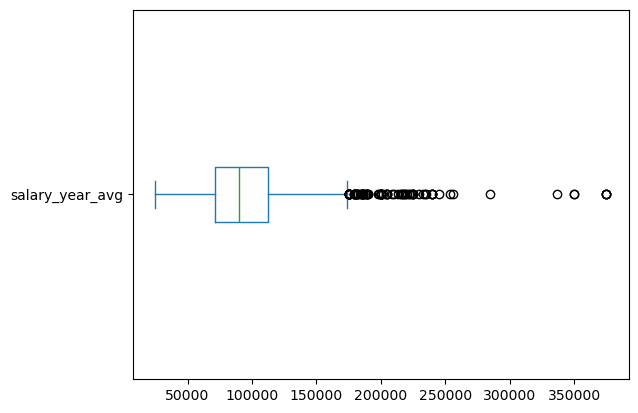

In [7]:
df_DA_US['salary_year_avg'].plot(kind='box',vert=False)

{'whiskers': [<matplotlib.lines.Line2D at 0x20305aa6b90>,
 'caps': [<matplotlib.lines.Line2D at 0x20305ab4090>,
 'boxes': [<matplotlib.lines.Line2D at 0x20305aa6150>],
 'medians': [<matplotlib.lines.Line2D at 0x20305ab5310>],
 'fliers': [<matplotlib.lines.Line2D at 0x20305ab5c90>],
 'means': []}

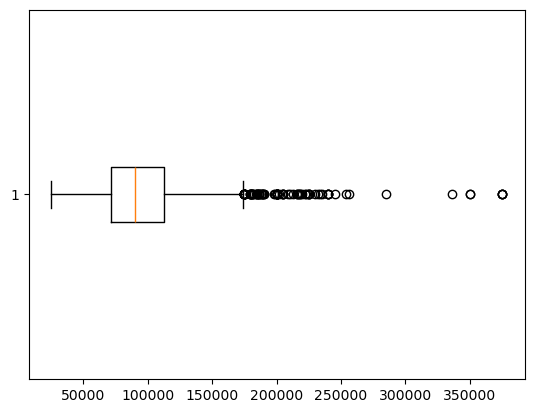

In [8]:
plt.boxplot(df_DA_US['salary_year_avg'],vert=False)

C:\Users\shyam\AppData\Local\Temp\ipykernel_43816\147647261.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list, labels=job_titles,vert=False)


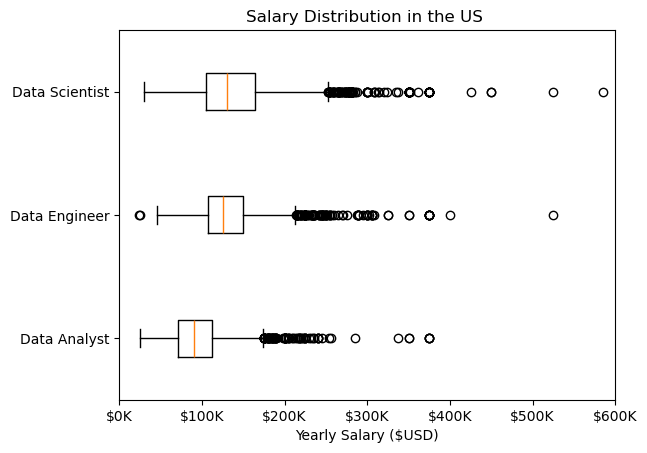

In [28]:
job_titles = ['Data Analyst','Data Engineer','Data Scientist']

df_US = df[(df['job_title_short'].isin(job_titles)) & (df['job_country']=='United States')].copy()
df_US = df_US.dropna(subset=['salary_year_avg'])

job_list =[df_US[df_US['job_title_short']==job_title]['salary_year_avg'] for job_title in job_titles]

plt.boxplot(job_list, labels=job_titles,vert=False)
plt.title('Salary Distribution in the US ')
plt.xlabel('Yearly Salary ($USD)')


ax=plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos:f'${int(x/1000)}K'))
plt.xlim(0,600000)
plt.show()

In [25]:
job_list[0]

109        89000.0
180        90250.0
410       133285.0
988        62623.0
1413       71300.0
            ...   
782637     70000.0
782798    111175.0
783588    125000.0
783866    115000.0
784882     87500.0
Name: salary_year_avg, Length: 4350, dtype: float64

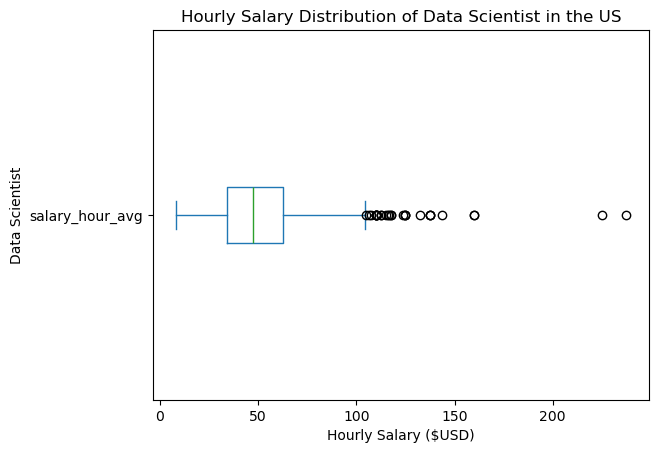

In [ ]:
df_DS_US = df[(df['job_title_short']=='Data Scientist') & (df['job_country']=='United States')].copy().dropna(subset=['salary_hour_avg']).copy()
df_DS_US['salary_hour_avg'].plot(kind='box',vert=False)
plt.title('Hourly Salary Distribution of Data Scientist in the US')
plt.ylabel('Data Scientist')
plt.xlabel('Hourly Salary ($USD)')
plt.show()

In [33]:
countries = ['United States', 'Canada']

In [42]:
df_DA_US_CA=df[(df['job_country'].isin(countries)) & (df['job_title_short']=='Data Analyst')].copy()
df_DA_US_CA=df_DA_US_CA.dropna(subset=['salary_hour_avg'])

In [43]:
countries_data = [df_DA_US_CA[df_DA_US_CA['job_country']==country]['salary_hour_avg']for country in countries]

C:\Users\shyam\AppData\Local\Temp\ipykernel_43816\483930032.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(countries_data,labels=countries)


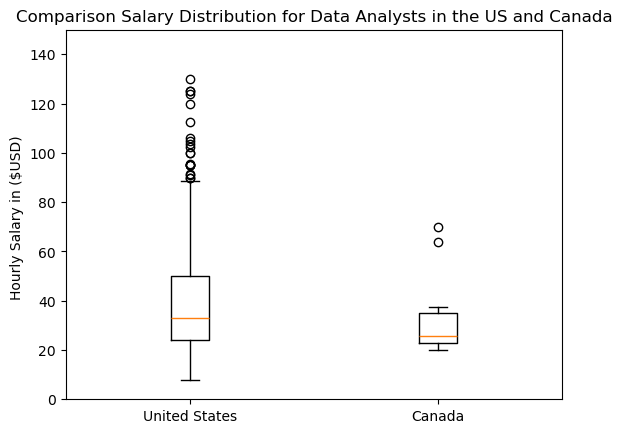

In [44]:
plt.boxplot(countries_data,labels=countries)
plt.xlabel('')
plt.ylabel('Hourly Salary in ($USD) ')
plt.title('Comparison Salary Distribution for Data Analysts in the US and Canada')
plt.ylim(0,150)
plt.show()

In [45]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

In [ ]:
df_CA = df[df['job_country']=='Canada'].copy()
df_CA = df_CA.dropna(subset=['salary_hour_avg'])
job_list = [df_CA[df_CA['job_title_short']==job]['salary_hour_avg'] for job in job_titles]


C:\Users\shyam\AppData\Local\Temp\ipykernel_43816\1481707825.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(job_list,labels=job_titles)


Text(0.5, 1.0, 'Comparison of Hourly Salaries for Data Positions in Canada')

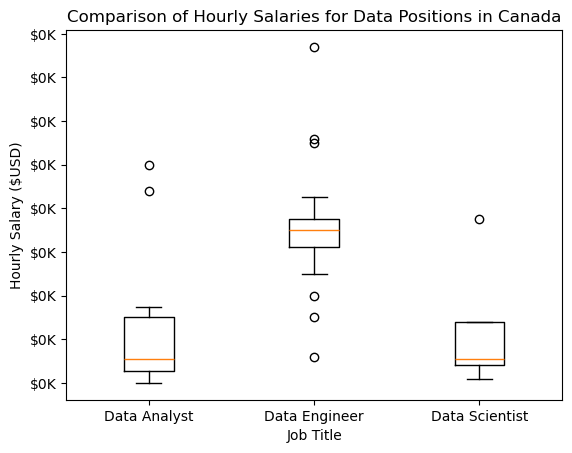

In [51]:
fig,ax = plt.subplots()
ax.boxplot(job_list,labels=job_titles)
ax.set_xlabel('Job Title')
ax.set_ylabel('Hourly Salary ($USD)')
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y,pos:f'${int(y/1000)}K'))
ax.set_title('Comparison of Hourly Salaries for Data Positions in Canada')